# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель исследования -**

Изучить параметры и выявить зависимости, влиящие на рыночную стоимость объектов недвижимости 

**Ход исследования**

1. Обзор данных
2. Предобработка данных
3. Обзор и исследование параметров, влияющих на стоимость объектов
4. Определение средней стоимости 1м2 в 10 крупных населённых пунктах 
5. Определениие средней стоимости на разном удалении от центра Санкт-Петербурга

**Описание данных**

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию

In [1]:
# импорт библиотеки pandas
import pandas as pd 
#импорт библиотеки numpy
import numpy as np
#импорт библиотеки seaborn
import seaborn as sns
#импорт библиотеки matplotlib
import matplotlib.pyplot as plt
#чтение файла с данными и сохранение в data
data = pd.read_csv ('/datasets/real_estate_data.csv', sep ='\t')
#отобразить все столбцы
pd.set_option('max_columns', None)

In [2]:
#получение первых 20 строк таблицы data
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
# получение общей информации о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. 

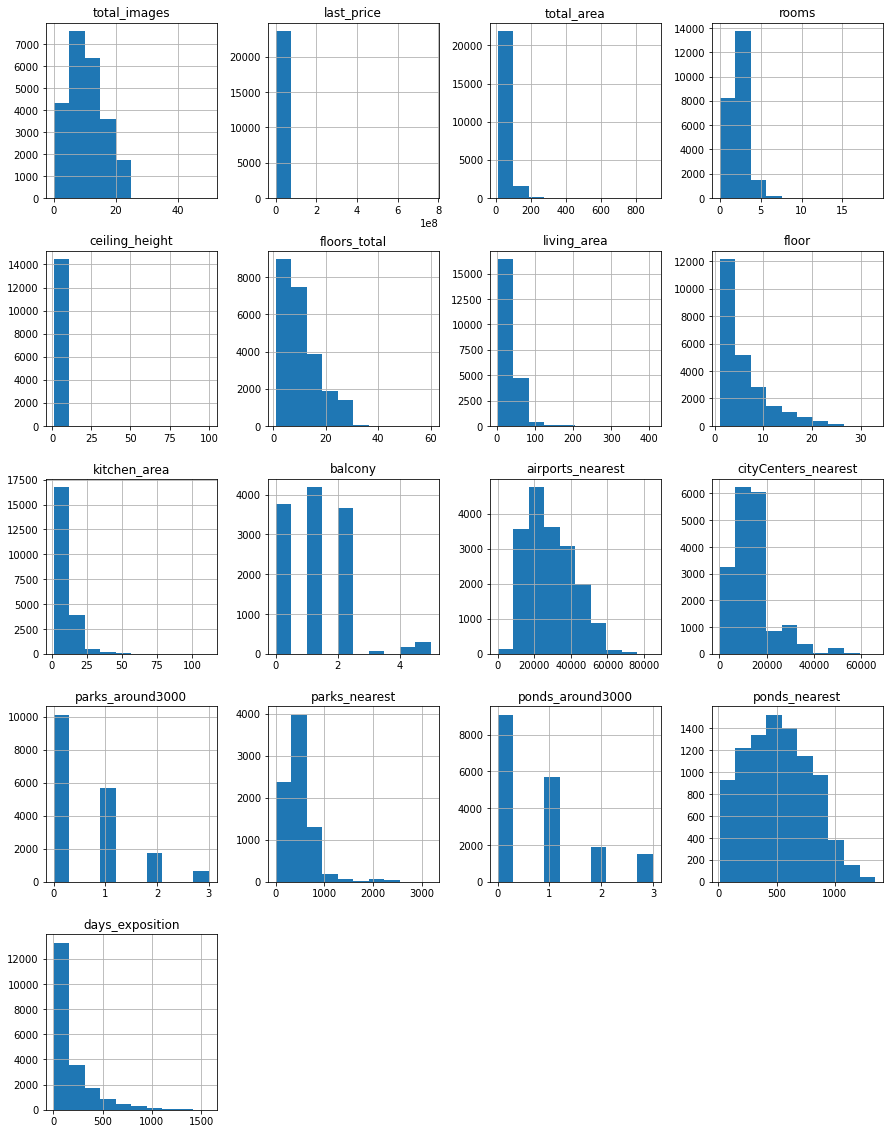

In [4]:
#построение гистрограммы для всех числовых столбцов
data.hist(figsize=(15,20))
plt.show()

#### Вывод

В представленном датафрейме 21 столбец и 23699 записи с объявлениями о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. В 14 столбцах обнаружены пропущенные значения, в столбцах 'last_price', 'first_day_exposition', 'floors_total', 'balcony', 'days_exposition' некорректный тип данных. 
Перейдем к обработке данных.

### Выполните предобработку данных

#### Переименование столбцов

In [5]:
# перечень названий столбцов таблицы data
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Переименуем столбец 'cityCenters_nearest', 'parks_around3000' и 'ponds_around3000'.

In [6]:
#переименование столбцов
data.rename(
    columns={'cityCenters_nearest':'city_сenters_nearest',
            'parks_around3000':'parks_around_3000',
            'ponds_around3000': 'ponds_around_3000'}, inplace = True)
#проверка названий столбцов после замены
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Обработка пропущенных значений 

In [7]:
#подсчет пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
#генерируем описательную статистику для всех числовых столбцов
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Пропуски были обнаружены в столбцах:
1. 'ceiling_height' - высота потолков (м)    
2. 'floors_total' - всего этажей в доме
3. 'living_area' - жилая площадь в квадратных метрах (м²)
4. 'is_apartment' - апартаменты (булев тип)
5. 'kitchen_area' - площадь кухни в квадратных метрах (м²)
6. 'balcony' - число балконов
7. 'locality_name' - название населённого пункта
8. 'airports_nearest' - расстояние до ближайшего аэропорта в метрах (м)
9. 'city_сenters_nearest' - расстояние до центра города (м)
10. 'parks_around_3000' - число парков в радиусе 3 км
11. 'parks_nearest' - расстояние до ближайшего парка (м)
12. 'ponds_around_3000' - число водоёмов в радиусе 3 км
13. 'ponds_nearest' - расстояние до ближайшего водоёма (м)
14. 'days_exposition' - сколько дней было размещено объявление (от публикации до снятия) 

##### ceiling_height - высота потолков

Заменим проспуки на медианное значение. 

Данные с высотой до 2.4м и от 10м нереалистичны, они подлежат корректировке. 
Сначала разделим на 10 те значения столбца, высота потолков которых более 24м, вероятно в этих значениях допущена ошибка с запятыми (потолки менее 2.4м являются минимальной нормой в России). Затем заполним нереалистичные данные медианой. 

In [9]:
#замена значений в столбце 'ceiling_height' свыше 24м 
data.loc[data['ceiling_height']>=24,'ceiling_height'] = data['ceiling_height']/10

In [10]:
#замена нереалистичных значений медианным значением в столбце 'ceiling_height'
data['ceiling_height'] = (np.where((data['ceiling_height'] < 2.4) | (data['ceiling_height'] > 10),
                                   data['ceiling_height'].median(), data['ceiling_height'])
                                  )

In [11]:
#замена пропусков на медианное значение
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [12]:
#посмотрим уникальные значения столбца 'ceiling_height'
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  3.4 ,  3.06,  2.72,  2.54,  2.51,  2.78,
        2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,  2.45,
        3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,  3.16,  3.62,
        3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,  2.79,  2.95,
        4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,  2.4 ,  3.38,
        3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  3.57,  2.48,  2.62,
        2.82,  3.98,  2.63,  3.83,  3.52,  3.95,  3.75,  2.88,  3.67,
        3.87,  3.66,  3.85,  3.86,  4.19,  3.24,  4.8 ,  4.5 ,  4.2 ,
        3.36,  3.08,  3.68,  3.07,  3.37,  3.09,  8.  ,  3.26,  3.34,
        2.81,  3.44,  2.97,  3.14,  4.37,  2.68,  3.22,  3.27,  4.1 ,
        2.93,  3.46,  3.47,  3.33,  3.63,  3.32,  8.3 ,  2.98,  2.86,
        3.17,  4.4 ,

In [13]:
#подсчет пропусков в столбце 'ceiling_height'
data['ceiling_height'].isna().sum()

0

##### floors_total - всего этажей в доме

Посмотрим на количество пропусков в данном столбце.

In [14]:
#подсчет пропусков в столбце 'floors_total'
data['floors_total'].isna().sum()

86

86 пропущенных значений из 23699 - это небольшое количество, предлагаю заполнить их данными из столбца 'floor'. На результаты дальнейшего исследования вряд ли повлияет, и не будет искажения данных, как в случае заполнения пропусков медианным значением.

In [15]:
#замена пропусков на данные из столбца 'floor' в столбце'floors_total'
data['floors_total'] = data['floors_total'].fillna(data['floor'])

##### living_area - жилая площадь в квадратных метрах

Заменим пропущенные значения медианным значением доли от общей площади умноженным на общую площадь.

In [16]:
#в новой переменной считаем долю жилой площади от общей площади
data_coefficient_living = data ['living_area']/data ['total_area']
#заполняем пропуски в столбце'living_area' на произведение общей площади и медианного значения доли общей площади
data.loc[data['living_area'].isna(), 'living_area'] = data_coefficient_living.median()*data ['total_area']

##### is_apartment - апартаменты 

Посмотрим на количество объявлений о продаже аппартаментов.

In [17]:
#количество уникальных значений столбца 'is_apartment'
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

В продаже 50 аппартаментов, 2725 отметили жилую недвижимость. Вероятно в пропущенных значениях имеются в виду объявления о продаже жилой недвижимости. Поскольку эта информация не указана, можем заполнить эти данные на False.  

In [18]:
#замена пропусков на False в столбце'is_apartment'
data['is_apartment'] = data['is_apartment'].fillna(False)

##### kitchen_area - площадь кухни

Для начала посмотрим сколько пропусков у квартир-студий и у квартир с количеством комнат равным 0, их заменим значением 0. 

In [19]:
#вывод строк квартир-студий с проспущенными значениями площади кухни
data.query('kitchen_area.isna() & studio == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.500000,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.750000,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,14.196497,7,False,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.500000,21,False,True,False,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.000000,1,False,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17T00:00:00,0,2.65,25.0,18.200000,5,False,True,False,NaN,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.000000,10,False,True,False,NaN,NaN,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.000000,16,False,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,14.764357,8,False,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


In [20]:
#вывод строк с квартирами, количество комнат которых = 0 и проспущенными значениями площади кухни
data.query('kitchen_area.isna() & rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.500000,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.000000,1,False,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.750000,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.65,26.0,24.300000,19,False,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,14.196497,7,False,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.000000,16,False,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,2.65,24.0,18.000000,4,False,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,14.764357,8,False,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,2.65,9.0,18.000000,8,False,False,True,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [21]:
#замена значений в столбце 'kitchen_area' на 0 для студий
data.loc[data['studio']==True, 'kitchen_area'] = 0

#замена значений в столбце kitchen_area' на 0 в квартирах, где количество комнат = 0
data.loc[data['rooms']==0, 'kitchen_area'] = 0

In [22]:
#подсчет пропусков в столбце 'kitchen_area'
data['kitchen_area'].isna().sum()

2070

Оставшиеся 2070 пропусков заменим медианным значением доли от площади кухни умноженным на общую площадь.

In [23]:
#в новой переменной считаем долю площади кухни от общей площади
data_coefficient = data ['kitchen_area']/data ['total_area']
#заполняем пропуски в столбце'kitchen_area' на произведение общей площади и медианного значения доли площади кухни
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data_coefficient.median()*data ['total_area']

##### balcony - число балконов

Пропущенные значение предлагаю заменить на 0. В объвлении указали бы наличие балконов при их наличии.

In [24]:
#замена пропусков на 0 в столбце'balcony'
data['balcony'] = data['balcony'].fillna(0)

##### locality_name - название населённого пункта

Заменить пропущенные значения не представляется возможным, заполним их значением "неизвестный".

In [25]:
#замена пропусков на 'unknown' в столбце'locality_name'
data['locality_name'] = data['locality_name'].fillna('unknown')

##### city_сenters_nearest - расстояние до центра города 

Расстояние до центра города в основном важно для квартир в Санкт-Петербурге, посмотрим сколько проспущенных значений в объявлениях именно в городе. 

In [26]:
#вывод строк с пропущенными данными о расстоянии до центра в городе Санкт_Петербург
data.query('locality_name == "Санкт-Петербург" & city_сenters_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
81,9,10949000.0,68.00,2018-12-27T00:00:00,1,2.65,10.0,38.614473,6,False,False,False,11.657143,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593,20,4200000.0,38.30,2019-04-16T00:00:00,1,2.60,16.0,19.800000,10,False,False,False,10.100000,2.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,11,9899000.0,101.00,2018-12-12T00:00:00,3,3.00,5.0,62.000000,3,False,False,False,15.000000,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,7,37000000.0,161.00,2016-05-22T00:00:00,3,2.65,9.0,84.000000,8,False,False,False,27.600000,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,402.0
795,19,7100000.0,59.60,2019-02-13T00:00:00,2,3.40,5.0,36.600000,2,False,False,False,12.500000,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21668,9,4500000.0,34.30,2019-03-04T00:00:00,1,2.65,9.0,17.500000,3,False,False,False,8.900000,1.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21881,15,44500000.0,169.00,2019-02-28T00:00:00,3,3.30,9.0,101.000000,7,False,False,False,18.000000,4.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21955,19,130000000.0,431.00,2017-10-02T00:00:00,7,3.70,8.0,220.000000,5,False,False,False,20.000000,5.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,161.0
22554,5,3415000.0,31.65,2019-04-16T00:00:00,1,2.65,24.0,17.972766,14,False,False,False,8.700000,2.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В 61 объявлении Санкт-Петербурга отстутствуют данные о расстоянии до центра города, эти пропуски можем заменить медианным значением с группировкой по 'locality_name', а остальные оставим как есть. В остальных населенных пунктах этот параметр не столь важен.

In [27]:
#замена строк с пропущенными данными о расстоянии до центра в городе Санкт_Петербург медианным значением в столбце 'city_сenters_nearest'
data['city_сenters_nearest'] = (np.where((data['city_сenters_nearest'].isna()) & (data['locality_name'] == "Санкт-Петербург"),
                                   data['city_сenters_nearest'].median(), data['city_сenters_nearest'])
                                  )

##### days_exposition - сколько дней было размещено объявление

Заменим пропуски на медианное значение.

In [28]:
#замена пропусков на медианное значение
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

**Следующие столбцы оставим как есть, на ход исследования они не повлияют:**
- airports_nearest, 
- parks_around_3000
- parks_nearest
- ponds_around_3000
- ponds_nearest

In [29]:
#подсчет пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_сenters_nearest     5458
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition             0
dtype: int64

Пропуски заполнены там, где это было возможно, перейдем к изменению типов данных.

#### Изменение типов данных

In [30]:
#обзор типов данных в каждом столбце
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_сenters_nearest    float64
parks_around_3000       float64
parks_nearest           float64
ponds_around_3000       float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Изменим тип данных в столбцах *'last_price', 'floors_total', 'balcony', 'days_exposition'* с помощью `astype()`, так как они содержат целые числа.

Столбец *'first_day_exposition'* с информацией о дате публикаций приведем к типу *datetime*.

In [31]:
data['last_price'] = data['last_price'].astype(int) 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S') 
data['floors_total'] = data['floors_total'].astype(int) 
data['balcony'] = data['balcony'].astype(int) 
data['days_exposition'] = data['days_exposition'].astype(int)

#### Обработка дубликатов

In [32]:
# подсчёт явных дубликатов
data.duplicated().sum() 

0

Явных дубликатов не обнаружено. 

Далее найдем неявные дубликаты в названиях населенных пунктов. 

In [33]:
#просмотр количества уникальных названий населенных пунктов
data['locality_name'].nunique()

365

In [34]:
#просмотр уникальных названий населенных пунктов в алфавитном порядке и с выведением названий с каждой строки
set(data['locality_name'].sort_values(ascending=True).unique())

{'unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское

In [35]:
#избавимся от неявных дубликатов
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(
        {'Мурино': 'поселок Мурино', 
         'Любань': 'поселок Любань', 
         'Рябово': 'поселок городского типа Рябово',
         'поселок станции': 'посёлок при железнодорожной станции'},regex=True)
)
#количество уникальных значений после 
len(data.locality_name.unique())

331

#### Вывод

В ходе предобработке данных:


- переименовали столбцы 'cityCenters_nearest', 'parks_around3000' и 'ponds_around3000' на 'city_сenters_nearest', 'parks_around_3000', 'ponds_around_3000';


- обработали пропущенные значения в столбцах, где это было возможно:
    * 'ceiling_height' и 'days_exposition' заполнили медианным значением
    * 'floors_total' заполнили значениями из столбца 'floor'
    * 'is_apartment' заполнили данные на False
    * 'balcony' заполнили нулями (отсутствие балконов)
    * 'kitchen_area'заменили медианным значением доли от площади кухни умноженным на общую площадь, столбец 'living_area' по тому же принципу
    * 'city_сenters_nearest' заменили частично на медианное значение для города Санкт-Петербург
    * 'locality_name' заменили значением 'unknown'
    
    
- изменили тип данных на int в столбцах с целыми числами, привели столбец 'first_day_exposition' к типу datetime;


- избавились от неявных дубликатов в названиях населенных пунктов. 

### Добавьте в таблицу новые столбцы

#### Столбец цена за квадратный метр

In [36]:
#создание нового столбца с информацией о стоимости 1м2, с округлением до 2 значений после запятой
data['price_one_meter'] = round(data['last_price']/data['total_area'],2)

#### Столбцы с днем недели, месяцем и годом публикации

In [37]:
#создание нового столбца с днем недели публикации
data['weekday'] = data['first_day_exposition'].dt.weekday
#создание нового столбца с месяцем публикации
data['month'] = data['first_day_exposition'].dt.month
#создание нового столбца с годом публикации
data['year'] = data['first_day_exposition'].dt.year

#### Столбец тип этажа

Создадим функцию type_floor для категоризации типа этажа квартир.

In [38]:
#функция для расчета типа этажа
#Если этаж = 1, функция вернет этаж "первый", если этаж = всего этажей в доме, выведет "последний", иначе "другой"
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
#создание столбца типа этажа 
data['type_floor'] = data.apply(type_floor,axis=1)
#проверим работу функции на первый 20 строках столбцов ['floor', 'floors_total', 'type_floor']
data[['floor', 'floors_total', 'type_floor']].head(20)

,floor,floors_total,type_floor
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
7,22,24,другой
8,26,27,другой
9,7,9,другой


#### Стобец расстояние до центра города в километрах

In [39]:
#создание столбца расстояние до центра города в км с округлением до ближайших целых значений
data['city_сenters_nearest_km'] = round(data['city_сenters_nearest']/1000)

### Проведите исследовательский анализ данных

#### Обзор параметров

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка

**Общая площадь**

In [40]:
#посмотрим на статистику столбца 'total_area'
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Самые малые по площади 12м2, такие действительно существуют, как и с большей площадью в 900м2. Отобразим на графике только квартиры с площадью с 12до 150м2 и посмотрим на распределение.

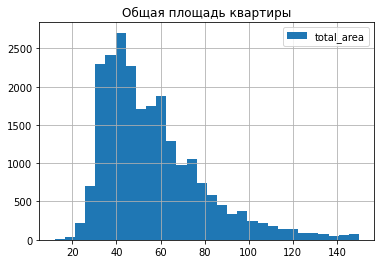

In [41]:
#строим гистограмму на 30 корзин с отображением значений от 12 до 150м2
data['total_area'].hist(bins=30, legend=True, range=(12,150))
#установка заголовка графика
plt.title('Общая площадь квартиры')
#показ графика
plt.show()

Квартиры с площадью 30-50м2 пользуются большей популярностью, а квартир от 120м2 не так уж и много.

**Жилая площадь**

In [42]:
#посмотрим на статистику столбца 'living_area'
data['living_area'].describe()

count    23699.000000
mean        34.578214
std         22.340665
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

Минимальная жилая площадь 2м2, подозрительно мало, посмотрим сколько объявлений с жилой площадью менее, например, 8м2 (минимальная площадь спальни), если значений не так много, предлагаю убрать их.

In [43]:
#вывод строк с жилой площадью менее 8м2
data.query('living_area<8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_meter,weekday,month,year,type_floor,city_сenters_nearest_km
3242,7,4440000,41.0,2017-07-02,1,2.65,17,3.000000,17,False,False,False,11.000000,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216,108292.68,6,7,2017,последний,13.0
13915,20,6350000,52.0,2018-02-06,2,3.00,6,2.000000,2,False,False,False,9.000000,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91,122115.38,1,2,2018,другой,7.0
16431,13,3799000,31.0,2018-04-12,1,2.60,5,6.000000,1,False,False,False,17.000000,0,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168,122548.39,3,4,2018,первый,5.0
17582,11,2680000,22.0,2018-08-11,0,2.65,25,5.000000,8,False,True,False,0.000000,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70,121818.18,5,8,2018,другой,12.0
17961,3,1400000,13.0,2017-12-03,1,2.60,9,7.382179,1,False,False,False,2.228571,0,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410,107692.31,6,12,2017,первый,16.0
19251,19,4050000,33.0,2018-10-15,1,2.50,22,6.500000,21,False,False,False,18.000000,0,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44,122727.27,0,10,2018,другой,11.0
19546,3,1850000,13.0,2019-03-11,1,3.40,5,7.382179,2,False,False,False,2.228571,0,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24,142307.69,0,3,2019,другой,5.0
19558,2,1686000,13.2,2018-12-17,1,2.65,5,7.495751,1,False,False,False,2.262857,0,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19,127727.27,0,12,2018,первый,4.0
21758,0,2330000,23.0,2018-01-01,0,2.65,24,2.000000,22,False,True,False,0.000000,0,поселок поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66,101304.35,0,1,2018,другой,NaN
21943,15,6100000,77.6,2019-02-28,4,2.50,9,5.400000,1,False,False,False,9.800000,0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33,78608.25,3,2,2019,первый,11.0


Уберем эти строки и построим график.

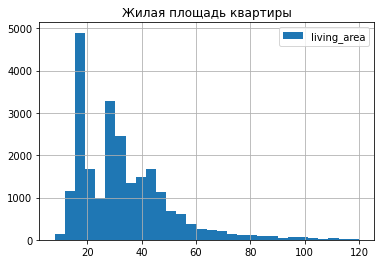

In [44]:
data = data.query('living_area>8')
#строим гистограмму на 30 корзин с отображением значений от 8 до 120м2
data['living_area'].hist(bins=30, legend=True, range=(8,120))
#установка заголовка графика
plt.title('Жилая площадь квартиры')
#показ графика
plt.show()

Квартир с жилой площадью 18м2 большинство, посмотрим что с площадью кухонь.

**Площадь кухни**

In [45]:
#посмотрим на статистику столбца 'kitchen_area'
data['kitchen_area'].describe()

count    23686.000000
mean        10.441968
std          6.067351
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Большие кухни скорее редкость, вероятно они относятся к квартирам с редкими большими площадями. Предлагаю посмотреть на графики кухни размером до 30м2, их наверняка большинство в нашей выборке.

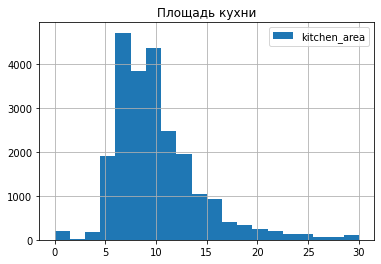

In [46]:
#строим гистограмму на 20 корзин с отображением значений от 0 до 30м2
data['kitchen_area'].hist(bins=20, legend=True, range=(0,30))
#установка заголовка графика
plt.title('Площадь кухни')
#показ графика
plt.show()

Кухни с площадью 6, 9 и 10м2 самые распространенные.

**Цена объекта**

In [47]:
#посмотрим на статистику столбца 'last_price'
data['last_price'].describe()

count    2.368600e+04
mean     6.540353e+06
std      1.088312e+07
min      1.219000e+04
25%      3.401250e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [48]:
#определим минимальное значение столбца 'last_price'
data['last_price'].min()

12190

Вряд ли есть реальные квартиры с такой стоимостью, посмотрим публикации со стоимостью, например, до 400 тыс. 

In [49]:
#вывод срок с ценой объектов до 400 тыс.
data.query('last_price<40000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_meter,weekday,month,year,type_floor,city_сenters_nearest_km
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8,111.83,2,3,2019,последний,9.0


Всего одна публикация, так как она может повлиять на графики, удалим ее из таблицы.

In [50]:
#удаление публикации с аномально низкой ценой
data = data.query('last_price>12190')

In [51]:
#проверка статистики столбца 'last_price'
data['last_price'].describe()

count    2.368500e+04
mean     6.540628e+06
std      1.088327e+07
min      4.300000e+05
25%      3.405000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

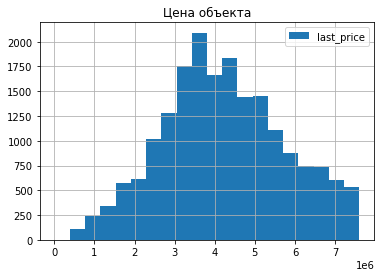

In [52]:
#строим гистограмму на 30 корзин с отображением значений от min до max
data['last_price'].hist(bins=20, legend=True, range=(1.2e+04,7.6e+06))
#установка заголовка графика
plt.title('Цена объекта')
#показ графика
plt.show()

Из графика модем сделать вывод, что большинство квартир размещено со стоимостью от 2.5 до 6 млн. 

**Количество комнат**

In [53]:
#посмотрим на статистику столбца 'rooms'
data['rooms'].describe()

count    23685.000000
mean         2.071015
std          1.078308
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

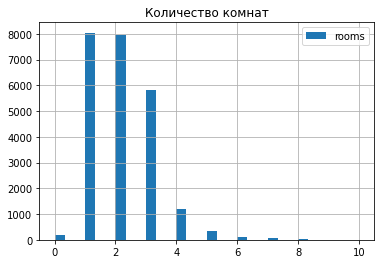

In [54]:
#строим гистограмму на 30 корзин с отображением значений от 0 до 10
data['rooms'].hist(bins=30, legend=True, range=(0,10))
#установка заголовка графика
plt.title('Количество комнат')
#показ графика
plt.show()

Популярностью пользуются 1 и 2 комнатные квартиры, следом идут 3 комнатные.

**Высота потолков**

В разделе предобработки уже были обработаны аномальные значения. Построим график.

In [55]:
data['ceiling_height'].describe()

count    23685.000000
mean         2.698528
std          0.236064
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

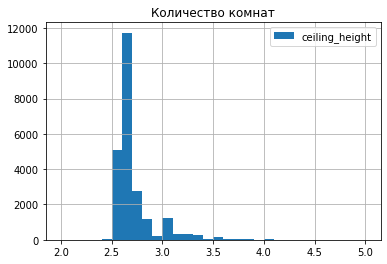

In [56]:
#строим гистограмму на 30 корзин с отображением значений от 2 до 5
data['ceiling_height'].hist(bins=30, legend=True, range=(2,5))
#установка заголовка графика
plt.title('Количество комнат')
#показ графика
plt.show()

Квартиры с высокими потолками встречаются реже, в основном высота 2.65 м.

**Тип этажа квартиры и общее количество этажей в доме**

In [57]:
#посмотрим на статистику столбца 'floors_total'
data['floors_total'].describe()

count    23685.000000
mean        10.670129
std          6.594831
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Самый высокий жилой дом Санкт-Петербурга - 37 этажей. Предлагаю убрать из выборки значения выше.

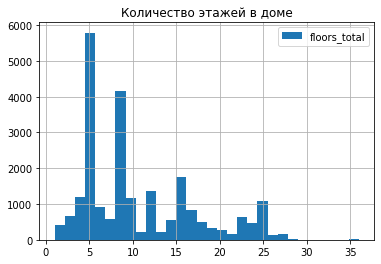

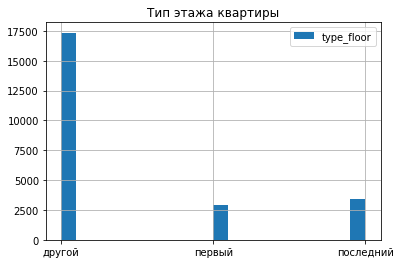

In [58]:
data = data.query('floors_total<37')
#строим гистограмму на 30 корзин 
data['floors_total'].hist(bins=30, legend=True)
#установка заголовка графика
plt.title('Количество этажей в доме')
#показ графика
plt.show()

#строим гистограмму на 20 корзин 
data['type_floor'].hist(bins=20, legend=True)
#установка заголовка графика
plt.title('Тип этажа квартиры')
#показ графика
plt.show()

Большинство предложений о продаже квартир в 5-ти и 9-ти этажном доме. Квартир на первом и последнем этажах значительно меньше.

**Расстояние до центра города и до ближайшего парка**

In [59]:
data[['city_сenters_nearest', 'parks_nearest']].describe()

,city_сenters_nearest,parks_nearest
count,18225.000000,8067.000000
mean,14188.982030,490.739680
std,8592.326011,342.477983
min,181.000000,1.000000
25%,9254.000000,288.000000
50%,13098.500000,455.000000
75%,16285.000000,612.000000
max,65968.000000,3190.000000


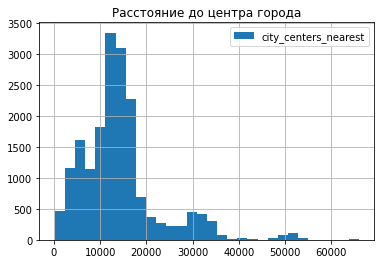

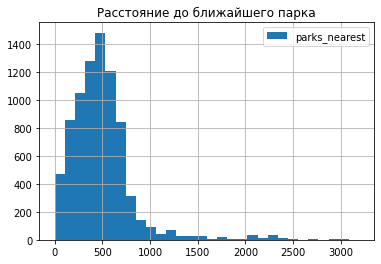

In [60]:
#строим гистограмму на 30 корзин 
data['city_сenters_nearest'].hist(bins=30, legend=True)
#установка заголовка графика
plt.title('Расстояние до центра города')
#показ графика
plt.show()

#строим гистограмму на 30 корзин 
data['parks_nearest'].hist(bins=30, legend=True)
#установка заголовка графика
plt.title('Расстояние до ближайшего парка')
#показ графика
plt.show()

В среднем расстояние до центра города составляет 14 км, до ближайшего парка 500 м.

**Выводы**

Изучив параметры площади, цены, количества комнат, высоты потолков, тип и общее количество этажей, расстояния до центра города и ближайшего парка можем сделать вывод, что большая часть объявлений имеют квартиры:

    - общей площадью в 50м2, из них с жилой площадью 18 м2 и площадью кухни 6м2
    - однокомнатные или двухкомнатные
    - с потолками высотой 2.6м 
    - в 5 или 9 этажом доме, первый и последний этажи не в приоритете
    - с расстоянием до центра города 14 км
    - с расстоянием до ближайшего парка в среднем 500м.

#### Время продажи квартир

Построим гистограмму для столбца 'days_exposition'.

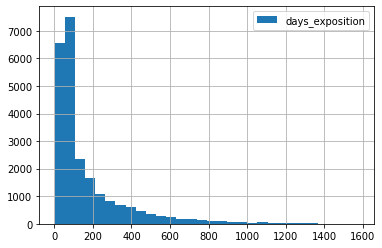

In [61]:
#строим гистограмму на 30 корзин 
data['days_exposition'].hist(bins=30, legend=True)
#показ графика
plt.show()

Пик приходится на первые 100 дней.
Для наглядности укрупним график, выведем статистику и на графике отметим среднее и медианное значение.

In [62]:
#посмотрим на статистику столбца 'days_exposition'
data['days_exposition'].describe()

count    23682.000000
mean       169.399671
std        206.585763
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

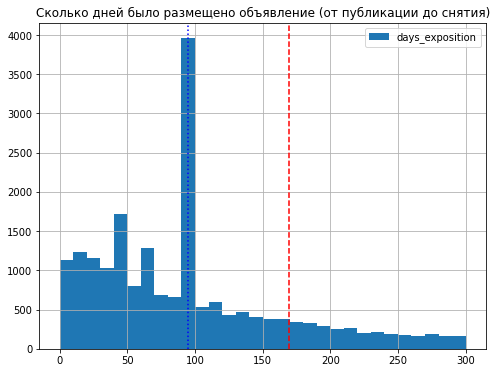

In [63]:
#сделаем расчет средного и медианного значения для передачи значений на график
mean_value = data['days_exposition'].mean()
median_value = data['days_exposition'].median()

#строим гистограмму на 30 корзин с отображением значений от 0 до 300 и размеров 8х6
data['days_exposition'].hist(bins=30, legend=True, range=(0,300), figsize=(8,6))
#установка заголовка графика
plt.title('Cколько дней было размещено объявление (от публикации до снятия)')
#добавление вертикальной линии для среднего значения с красным цветом и пунктирной линией
plt.axvline(x=mean_value, label='mean', color='r', linestyle='--')
#добавление вертикальной линии для медианного значения с синим цветом и точечной линией
plt.axvline(x=median_value, label='median', color='b', linestyle=':')
#показ графика
plt.show()

##### Вывод 

Медиана более точно отображает сколько в среднем занимает продажа квартиры - 95 дней. Объявления, размещенные больше года, необычно долгие, быстрыми же можно назвать снятые с публикации в первые 50 дней.

#### Факторы, влияющие на общую (полную) стоимость объекта

##### Зависимость цены от общей площади

Создадим функцию для вывода графиков зависимости цены от общей площади, жилой площади и площади кухни.

In [64]:
#объявление функции с параметром row
def influence_1(row):
    #визуализация, значения 'last_price' выведем до 7.6e+07 для удобства просмтора графика 
    result = (
        data.query('last_price<7.6e+07').plot(
        x=row, 
        y='last_price',
        kind= 'scatter', 
        grid=True, 
        color='#52796f', 
        figsize=(8, 6), 
        alpha = 0.4)
    )
    #вывод коэффициента корреляции
    print('Коэффициент корреляции Пирсона равен', data['last_price'].corr(data[row]))
    # Настройки внешнего вида графика
    plt.xlabel(row)
    plt.ylabel('price')
    return result

Коэффициент корреляции Пирсона равен 0.6537245211740587


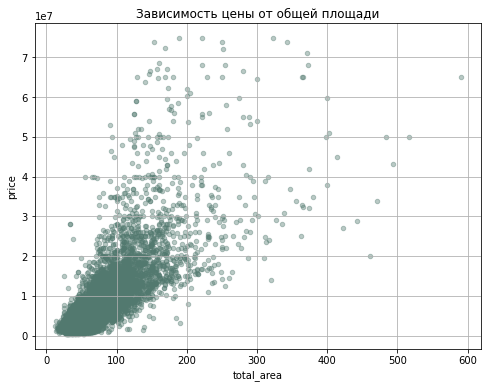

In [65]:
#вывод функции
influence_1('total_area')
#установка заголовка графика
plt.title('Зависимость цены от общей площади')
#показ графика
plt.show()

*Вывод:*

Цена объекта зависит от общей площади, при увеличении общей площади квартиры ее цена растет, что подтверждает график и коэффициент корреляции Пирсона 0.65.

##### Зависимость цены от жилой площади

Коэффициент корреляции Пирсона равен 0.5865447945907235


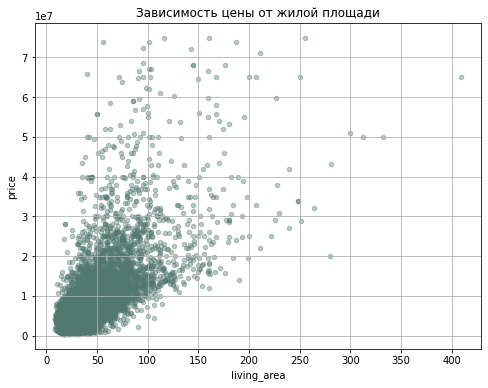

In [66]:
#вывод функции
influence_1('living_area')
#установка заголовка графика
plt.title('Зависимость цены от жилой площади')
#показ графика
plt.show()

*Вывод:*

Как и с общей площадью, есть положительная зависимость цены от жилой площади, но коэффициент корреляции Пирсона чуть ниже - 0.58.

##### Зависимость цены от площади кухни

Коэффициент корреляции Пирсона равен 0.5095761267432908


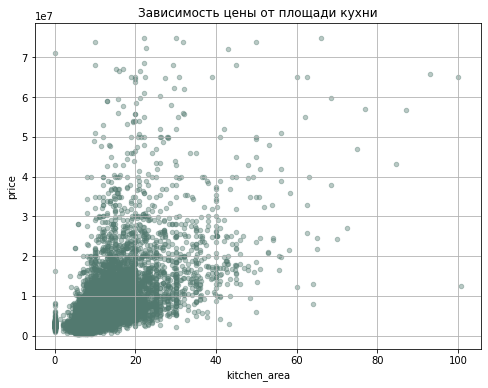

In [67]:
#вывод функции
influence_1('kitchen_area')
#установка заголовка графика
plt.title('Зависимость цены от площади кухни')
#показ графика
plt.show()

*Вывод:*

Умеренная положительная зависимость цены от площади кухни (коэффициент корреляции Пирсона = 0.5).

##### Зависимость цены от количества комнат

Создадим функцию для вывода графиков зависимости цены от количества комнат, расположения этажа квартиры и даты публикации.

In [68]:
#объявление функции с параметром row
def influence_2(row):
    #создадим сводную таблицу, значения 'last_price' выведем до 7.6e+07 для удобства просмтора графика 
    result = (
        data.query('last_price<7.6e+07').pivot_table(
            index=row, 
            values='last_price', 
            aggfunc='median')
        #визуализация
        .plot(grid=True, color='#52796f', figsize=(8, 6))
    )
    # Настройки внешнего вида графика
    plt.xlabel(row)
    plt.ylabel('price')
    return result

Коэффициент корреляции Пирсона равен 0.3633665907814604


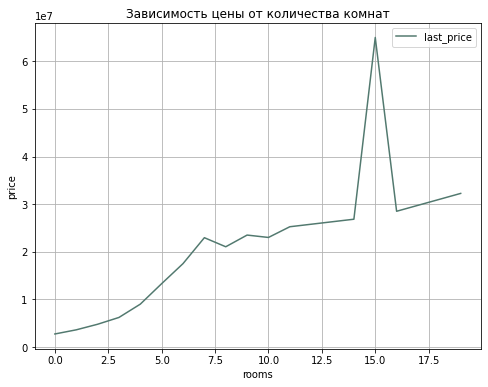

In [69]:
#вывод коэффициента корреляции
print('Коэффициент корреляции Пирсона равен', data['last_price'].corr(data['rooms']))
#вывод функции
influence_2('rooms')
#установка заголовка графика
plt.title('Зависимость цены от количества комнат')
#показ графика
plt.show()

*Вывод:*

Связь цены и количества комнат присутствует, на графике можем наблюдать умеренное увеличение цены (коэффициент корреляции Пирсона = 0.36). Скачек на графике в значении количества комнат = 15, вероятно эксклюзивная квартира с очень большой площадью.

##### Зависимость цены от этажа, на котором расположена квартира

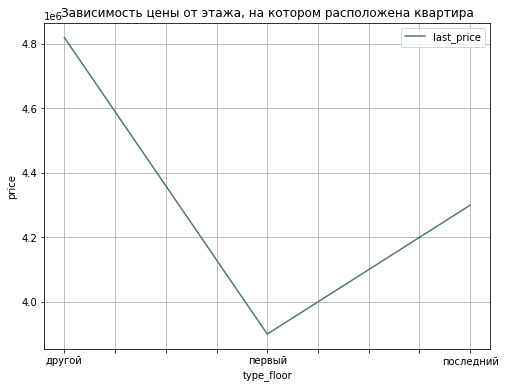

In [70]:
#вывод функции
influence_2('type_floor')
#установка заголовка графика
plt.title('Зависимость цены от этажа, на котором расположена квартира')
#показ графика
plt.show()

*Вывод:*

На первом и последнем этаже наблюдается снижение цены, что логично, на этих этажах чаще встречаются проблемы с отоплением, коммуникациями и прочим.

##### Зависимость цены от даты публикации (день недели, месяц, год)

Коэффициент корреляции Пирсона равен 0.0017198091333353457


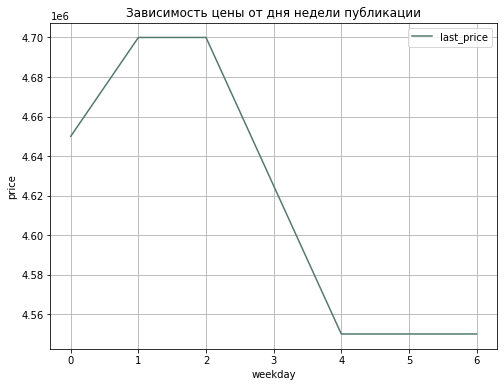

Коэффициент корреляции Пирсона равен 0.0024837040330465115


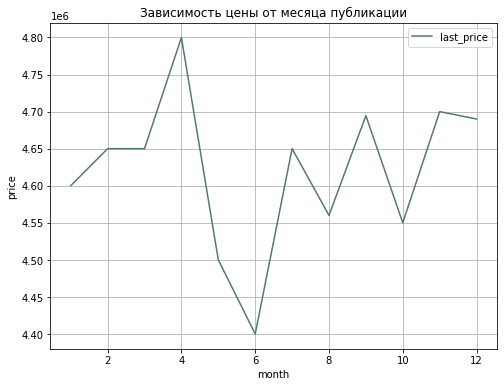

Коэффициент корреляции Пирсона равен -0.04251768294334455


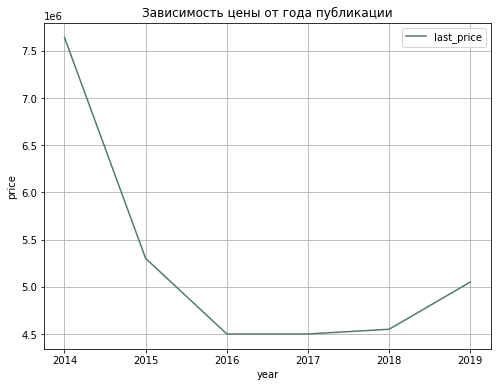

In [71]:
#вывод коэффициента корреляции
print('Коэффициент корреляции Пирсона равен', data['last_price'].corr(data['weekday']))
#вывод функции
influence_2('weekday')
#установка заголовка графика
plt.title('Зависимость цены от дня недели публикации')
#показ графика
plt.show()

#вывод коэффициента корреляции
print('Коэффициент корреляции Пирсона равен', data['last_price'].corr(data['month']))
influence_2('month')
#установка заголовка графика
plt.title('Зависимость цены от месяца публикации')
#показ графика
plt.show()

#вывод коэффициента корреляции
print('Коэффициент корреляции Пирсона равен', data['last_price'].corr(data['year']))
influence_2('year')
#установка заголовка графика
plt.title('Зависимость цены от года публикации')
#показ графика
plt.show()

*Вывод:*

Коэффициент корреляции Пирсона стримится к 0, что говорит об отсутсвии связи между ценой и датой публикации. 
Но с помощью графиков можно увидеть в каком день недели и месяце наиболее выгоные предложения с публикациями квартир. 

На графике зависимости цены от года публикации наблюдается спад цены, но возможно произошел спад не цен, а площадей продаваемых квартир, проверим эту теорию, построив график, показывающий с какой общей площадью продавались квартиры с 2014 по 2019 года.

Коэффициент корреляции Пирсона равен -0.07969896160915677


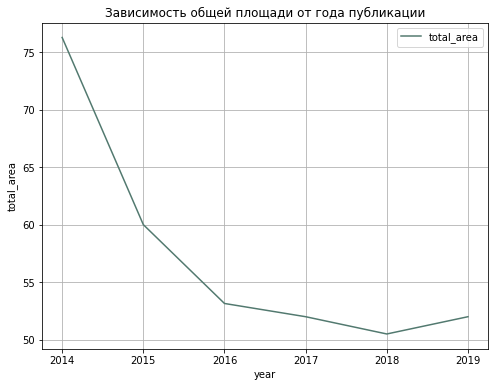

In [72]:
#свобная таблица 
(
    data.pivot_table(
        index='year', 
        values='total_area',
        aggfunc='median')
    #визуализация
    .plot(grid=True, color='#52796f', figsize=(8, 6))
)

#вывод коэффициента корреляции
print('Коэффициент корреляции Пирсона равен', data['total_area'].corr(data['year']))
# Настройки внешнего вида графика
plt.xlabel('year')
plt.ylabel('total_area')
plt.title('Зависимость общей площади от года публикации')
#показ графика
plt.show()

Теория подтвердилась. В период с 2016-2018 гг. чаще публиковались квартиры с небольшой общей площадью.

##### Вывод

1. Наиболее сильная корреляция у цены и общей площади - 0.65. Чем больше площадь квартиры, тем выше ее стоимость. 
2. Цена увеличивается с увеличением количества комнат, но спрос все-таки приходится на 1 и 2 комнатные квартиры. 
3. Также цена зависит от типа этажа, на графике наглядно можем наблюдать, что первый этаж выйдет покупателю дешевле.
4. Корреляция между ценой и днем недели, месяца, года публикации стремится в 0. Но по графикам можем выделить следующую закономерность: 
    - квартиры, опубликованные в выходные дешевле, чем в начале недели
    - выгодные предлодения публикуются в июне, в апреле дороже всего
    - с 2016 по 2018 года чаще встречались публикации с квартирами общей площадью 51-53м2


#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [73]:
#создание свобной таблицы по населенным пунктам с подсчетом количества объявлений и средней ценой за 1м2 
avg_price_one_meter = (
    data.pivot_table
    (index='locality_name', 
     values='price_one_meter',
    aggfunc={'count','mean'}).
    #сортировка по количеству объявлений в населенных пунктах по убыванию
    sort_values(by='count', ascending=False).
    #вывод 10 населенных пунктов с наибольшим количеством объвялений
    head(10)
)
#сортировка цен за 1м2 по убыванию 
avg_price_one_meter.sort_values(by='mean', ascending=False)

,count,mean
locality_name,,
Санкт-Петербург,15706,114829.504328
Пушкин,369,103125.819377
деревня Кудрово,299,92473.547559
поселок Парголово,327,90175.913089
поселок поселок Мурино,555,85653.613766
поселок Шушары,440,78677.364318
Колпино,338,75424.579112
Гатчина,307,68746.146515
Всеволожск,398,68654.473970


##### Вывод

Самая высокая средняя стоимость за квадратный метр в Санкт-Петербурге - 114822 тыс, низкая стоимость в Выборге - 58141 тыс. Максимальное число объявлений в городе Санкт-Петербург.

#### Средняя стоимость квартир Санкт-Петербурга на разном удалении от центра города

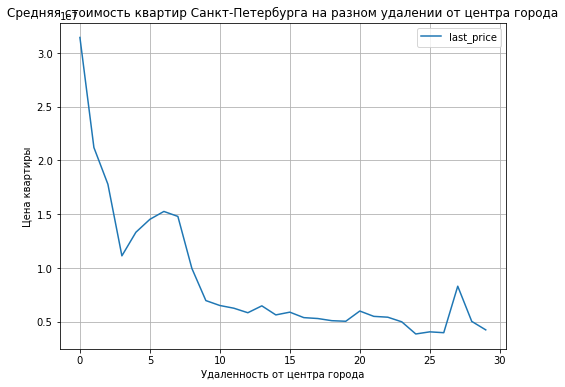

,last_price
city_сenters_nearest_km,
0.0,3.144912e+07
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.112658e+07
4.0,1.332119e+07
5.0,1.452456e+07
6.0,1.525795e+07
7.0,1.479526e+07
8.0,9.959492e+06


In [74]:
#создание свобной таблицы 
avg_last_price_spb = (
    data.query('locality_name=="Санкт-Петербург"').
    pivot_table(
    index='city_сenters_nearest_km',
    values='last_price',
    aggfunc='mean')
)

avg_last_price_spb.plot(grid=True, figsize=(8,6))
# Настройки внешнего вида графика
plt.xlabel('Удаленность от центра города')
plt.ylabel('Цена квартиры')
#установка заголовка графика
plt.title('Средняя стоимость квартир Санкт-Петербурга на разном удалении от центра города')
#показ графика
plt.show()
#вывод сводной таблицы 
avg_last_price_spb

#### Вывод

Самые дорогие квартиры находятся в центре Санкт-Петербурга, отдаляясь от центра города стоимость недвижимости падает.

### Общий вывод

В ходе нашего исследования были выполенены следующие шаги:


1. Изучение общей информации архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за 2014-2019 года:

    - в представленном датафрейме 21 столбец и 23699 записи с объявлениями о продаже квартир
    - в 14 столбцах присутсвуют пропущенные значения 
    - в 5 столбцах некорректный тип данных
    

2. Обработаны пропуски в данных, где это возможно, изменен тип целочисленных данных, даты и времени. Обработаны неявные дубликаты в названиях населенных пунктов.

    Пропуски заполнены в 8 столбцах:
        -'ceiling_height' -  высота потолков (м) 
        -'days_exposition' - сколько дней было размещено объявление (от публикации до снятия) 
        -'floors_total' - всего этажей в доме
        -'is_apartment' - апартаменты (булев тип)
        -'balcony' - число балконов
        -'kitchen_area' - площадь кухни в квадратных метрах (м²)
        -'living_area' - жилая площадь в квадратных метрах (м²)
        -'locality_name' - название населённого пункта
        
     Частично пропуски заполнены в столбце 'city_сenters_nearest' - расстояние до центра города (м). 


3. Добавление в таблицу столбцов с информацией о:
    - стоимости 1м2
    - днях недели, месяцев и годах публикации объявлений
    - типе этажа квартир
    - расстоянии до центра города в километрах
    
    
4. Обзор параметров и их визуализация:
    - общая площадь
    - жилая площадь
    - площадь кухни
    - цена объекта
    - количество комнат
    - высота потолков
    - тип этажа квартиры («первый», «последний», «другой»)
    - общее количество этажей в доме
    - расстояние до центра города в метрах
    - расстояние до ближайшего парка
    
Среднестатистическая публикация в исследуемой таблице это квартира с общей площадью 50м2 с 1-ой или 2-мя комнатами высотой потолка 2,6м на 5 или 9 этаже и расстоянием до центра Санкт-Петербурга 14 км вблизи парка около 500м.
    
5. Изучено как быстро продавались квартиры.

В среднем квартиры продаются в течение 3-х месяцев, быстрыми продажами считаются продажи в первые 50 дней, долгими после 1 года. 

6. Исследование зависимости цены.

Выявлена сильная зависимость цены от общей стоимости и количества комнат, а стоимость квартир на первом и последнем этаже уступает остальным. Таже было установлено, что стоимость квартир, опубликованных в выходные дни и в июне месяце вероятно обойдутся покупателю дешевле. В период с 2016 по 2018 года большая часть представленных объявлений приходилась на квартиры с общей площадью 51-53м2.

7. Определение средней стоимости 1м2 квартир в 10 населенных пунктах с наибольшим числом объявлений.

Самая высокая средняя стоимость за квадратный метр в Санкт-Петербурге - 114822 тыс, на втором месте Пушкин - 103125 тыс, самая низкая стоимость в Выборге - 58141 тыс. 

8. Определение средней стоимости квартир Санкт-Петербурга на разном удалении от центра города.

Чем ближе расположение от центра города, тем выше цена на недвижимость. 